<a href="https://colab.research.google.com/github/dooooing/2023_ESAA/blob/main/1006_%EC%A0%9C%EC%B6%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch8_1~3_p_466_~_486_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 ch8.1-3 p.466-486

# 8단원. 텍스트 분석

**NLP**(National Language Processing) : 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술 발전

**텍스트 분석**(=텍스트 마이닝) : 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술 발전

: 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업을 주로 수행

>* 텍스트 분류 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법 통칭
>* 감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법 총칭
>* 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법. 대표적으로 토픽 모델링
>* 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법. 텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용 가능

## 01. 텍스트 분석 이해



---

텍스트 분석 = 비정형 데이터인 텍스트를 분석하는 것

**피처 벡터화** 또는 **피처 추출** : 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것

* 텍스트를 피처 벡터화해서 변환하는 방법 -> **BOW**(Bag of Words), **Word2Vec**

### 텍스트 분석 수행 프로세스

1. **텍스트 사전 준비작업(텍스트 전처리)** : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미 없는 단어(Stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것 통칭

2. **피처 벡터화/추출** : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값 할당. 대표적으로 BOW와 Word2Vec. BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화

3. **ML 모델 수립 및 학습/예측/평가** : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가 수행

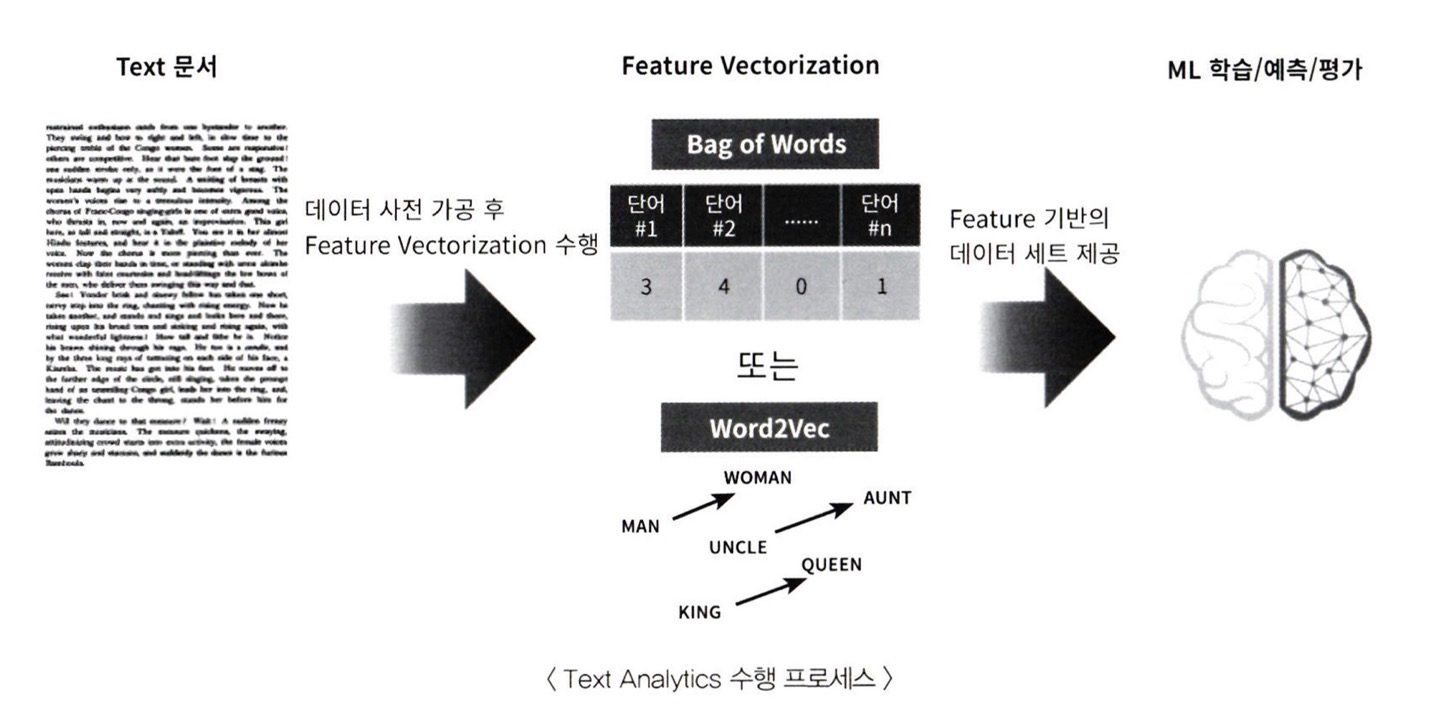

### 파이썬 기반의 NLP, 텍스트 분석 패키지

* **NLTK**(Natural Language Toolkit for Python) : 파이썬의 가장 대표적인 NLP 패키지.
  + 방대한 데이터 세트와 서브 모듈 가지고 있으며 NLP의 거의 모든 영역 커버.
  + 많은 NLP 패키지가 NLTK의 영향을 받아 작성.
  + 수행 속도 측면에서 아쉬운 부분이 있어 실제 대량의 데이터 기반에서는 제대로 활용x.

* **Gensim** : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지
  + 오래전부터 토픽 모데링을 쉽게 구현할 수 있는 기능 제공. Word2Vec 구현 등의 다양한 신기능도 제공
  + SpaCy와 함께 가장 많이 사용되는 NLP 패키지

* **SpaCy** : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지.

* 사이킷런은 머신러닝 위주의 라이브러리 -> NLP을 위한 다양한 라이브러리(ex.어근 처리)는 없지만 충분히 텍스트 분석 기능 수행 가능 -> 더 다양한 텍스트 분석 적용 필요한 경우 NLP 전용 패키지와 함께 결합

## 02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화



---


**텍스트 정규화** : 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것

=> 클렌징. 토큰화. 필터링/스톱 워드 제거/철자 수정. Stemming. Lemmatization

### 클렌징

**클렌징** : 텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업

ex) HTML, XML 태그나 특정 기호 등을 사전에 제거

### 텍스트 토큰화

* **문장 토큰화** : 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것. 정규 표현식에 따른 문자 토큰화도 가능

NTLK에서 **sent_tokenize()** 이용

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
              You can see it out your window or on your television. \
              You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


=> 각각의 문장으로 구성된 list 객체 반환

* **단어 토큰화** : 문장을 단어로 토큰화하는 것. 기본적으로 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어 분리. 정규 표현식 이용도 가능.

단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분

NTLK에서 **word_tokenize()**이용

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


sent_tokenize와 word_tokenize 조합해 문서에 대해서 모든 단어 토큰화 -> 문서를 먼저 문장으로 나누고, 개별 문장을 다시 단어로 토큰화

In [ ]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장을 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


=> 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시

=> 해결하고자 도입된 것이 **n-gram** : 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화 수행.


### 스톱 워드 제거

**스톱 워드**(Stop word) : 분석에 큰 의미가 없는 단어 지칭

ex) 문장을 구성하는 필수 문법 요소 -> 빈번하게 나타나. 오히려 중요한 단어로 인지 -> 제거 중요

* NTLK의 스톱 워드 -> NLTK의 **stopwords** 목록

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


=> 영어의 경우 스톱 워드의 개수 179개.

In [ ]:
# stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


=> is, this와 같은 스톱 워드가 필터링을 통해 제거됐음

### Stemming과 Lemmatization

**Stemming**과 **Lemmatization** : 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것.

* 두 기능 모두 원형 단어를 찾는다는 목적은 유사하지만, Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다
  + Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향.
  + Lemmatization은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어 찾아 -> 변환에 더 오랜 시간 필요

* NLTK는 다양한 Stemmer 제공 -> **Porter, Lancaster, Snowball Stemmer**. Lemmatization -> **WordNetLemmatizer**

* NLTK의 **LancasterStemmer** 이용해 Stemmer 살펴보기
  + 필요한 Stemmer 객체 생성 -> 이 객체의 stem('단어') 메서드 호출하면 원하는 '단어'의 Stemming 가능

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


=> amuse의 경우, amus를 원형 단어로 인식하는 오류. 비교형, 최상급형으로 변형된 단어의 정확한 원형 찾지 못하는 오류.

* NLTK의 **WordNetLemmatizer** 이용해 Lemmatization 수행
  + 단어의 '품사' 입력해줘야해. 동사의 경우 'v'. 형용사의 경우 'a'

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


=> 앞의 Stemmer보다 정확하게 원형 단어 추출해줌

## 03. Bag of Words - BOW



---

**Bag of Words**모델 : 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델


1. 문장에 있는 모든 단어에서 중복 제거 -> 각 단어를 칼럼 형태로 나열 -> 각 단어에 고유의 인덱스 부여

2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어(단어 인덱스)에 기재

* 장점
  + 쉽고 빠른 구축
  + 단순히 단어의 발생 횟수에 기반 but 문서의 특징 잘 나타내 -> 활용도 높아

* 단점
  + 문맥 의미 반영 부족 : 단어의 순서 고려x 때문. 보완 위해 n_gram 기법 활용 가능 but 제한적.
  + 희소 행렬 문제(희소성, 희소 행렬) : 하나의 문서에 있는 단어는 극히 일부분 -> 대부분의 데이터는 0 값으로 채워져. 희소행렬 -> 일반적으로 ML 알고리즘의 수행 시간과 예측 성능 떨어뜨려
    - 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬 = 희소 행렬

### BOW 피처 벡터화

**피처 벡터화** : 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환

BOW 모델에서 피처 벡터화 수행 = 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것

두 가지 방식

1. **카운트 벡터화** : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우

카운트 값이 높을수록 중요한 단어로 인식돼 -> 언어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값으로 부여돼

2. **TF-IDF 벡터화** : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 가되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값 부여

* 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능 보장.

### 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

사이킷런의 **CountVectorizer**클래스 : 카운트 기반의 벡터화 구현한 클래스

단지 피처 벡터화만 수행하지 않으며 텍스트 전처리도 함께 수행. fit(), transform()을 통해 피처 벡터화된 객체 반환

* 입력 파라미터
  >+ max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
  >+ min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터 -> 크게 중요하지 않거나 가비지(garbage)성 단어일 확률 높아서
  >+ max_features : 추출하는 피처의 개수를 제한. 정수로 값 지정.
  >+ stop_words : 'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
  >+ n_gram_range : Bag of Words 모델의 단어 순서를 어느 정도 보장하기 위한 n_gram 범위 설정. 튜플 형태로 (범위 최솟값, 범위 최댓값) 지정
  >+ analyzer : 피처 추출을 수행한 단위 지정. 디폴트는 'word'
  >+ token_pattern : 토큰화를 수행하는 정규 표현식 패턴 지정. 디폴트 값은 '\b\w\w+\b'
  >+ tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용

보통 사이킷런의 CountVectorizer 클래스 이용한 텍스트의 피처 벡터화 방법

1. 사전 데이터 가공 : 모든 문자를 소문자로 변환하는 등의 사전 작업 수행.
2. 토큰화 : 디폴트로 단어 기준으로 n_gram_range를 반영해 토큰화 수행
3. 텍스트 정규화 : Stop Words 필터링만 수행. Stemmer, Lemmatize는 CountVectorizer 자체에서는 지원x -> 함수 만들거나 외부 패키지로 미리 Text Normalization 수행 필요
4. 피처 벡터화 : max_df, min_df, max_features 등의 파라미터 반영해 토큰화된 단어를 피처로 추출하고 단어 빈도수 벡터 값 적용

* 사이킷런에서 TF-IDF 벡터화는 **TfidfVectorizer**클래스 이용 -> 파라미터, 변환 방법은 동일

### BOW 벡터화를 위한 희소 행렬

모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼 만들 수 밖에 없어 -> 대규모 행렬의 대부분의 값을 0이 차지하는 행렬=희소 행렬

* BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬. 메모리 공간 많이 필요+데이터 액세스 위한 시간 많이 소모 -> 희소 행렬을 물리적으로 적은 메모리 공간 차지할 수 있도록 변환

대표적인 방법 => **COO 형식**, **CSR 형식**

일반적으로 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 CSR 형식이 더 뛰어나 CSR 많이 사용

### 희소 행렬 - COO 형식

**COO 형식** : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가르키는 행과 열의 위치를 별도의 배열로 저장하는 방식

희소 행렬 변환 위해 주로 사이파이 이용. 사이파이의 **sparse**패키지.

In [ ]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

* 사이파이의 **coo_matrix**클래스 이용해 COO 형식의 희소 행렬로 변환
  + 0이 아닌 데이터를 별도의 배열 데이터로 만들고, 행 위치 배열과 열 위치 배열을 각각 만든 후 생성 파라미터로 입력

In [ ]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [ ]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

=> 다시 원래의 데이터 행렬로 추출됨

### 희소 행렬 - CSR 형식

**CSR 형식** : COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점 해결한 방식 -> 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식 의미

고유값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있기에 COO 방식보다 메모리가 적게 들고 빠른 연산 가능

* 사이파이의 **csr_matrix**클래스 이용해 CSR 형식의 희소 행렬로 변환
  + 0이 아닌 데이터 배열과 열 위치 배열, 그리고 행 위치 배열의 고유한 값의 시작 위치 배열을 생성 파라미터로 입력

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
# 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

* 사이킷런의 CountVectorizer나 TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 사이파이의 CSR 형태의 희소 행렬